In [1]:
import os

# get directory
current_dir = os.getcwd()

# function to make string with all the text from an album
def get_text(albumName):
    text = ''
    for song in os.listdir(f'{current_dir}/{albumName}'):
        
        if not(song.startswith(".")):
            with open(f"{current_dir}/{albumName}/{song}") as fp:
                song_text = fp.read()
                song_text = " ".join(song_text.split())
                song_text = song_text.replace("\'", "")
                song_text = song_text.replace("-", " ")
                song_text = song_text.lower()
            text = text + song_text
            
    return text

In [2]:
from wordcloud import WordCloud
import  matplotlib.pylab as plt

# function to make word cloud
def wordcloud(text, name):
    wc = WordCloud(max_font_size=40, include_numbers = True, background_color = 'white', collocations = False, min_word_length = 3, colormap = 'winter_r').generate(text)
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f'{name} word cloud')

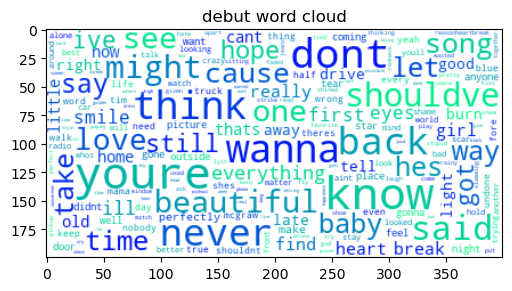

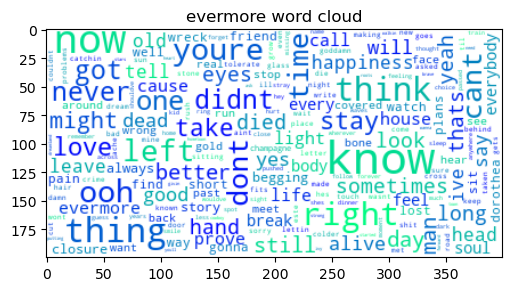

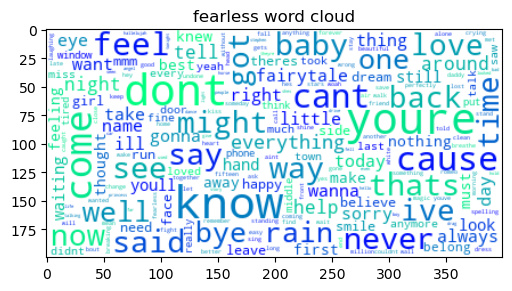

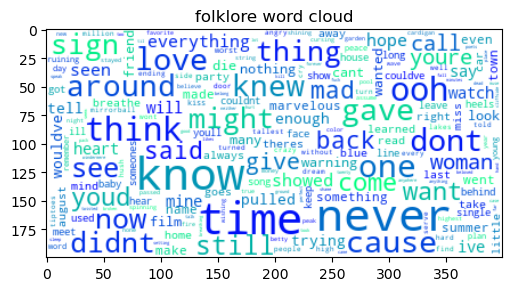

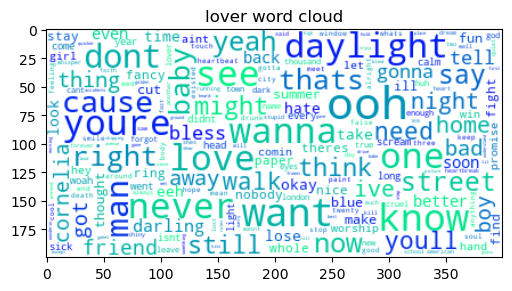

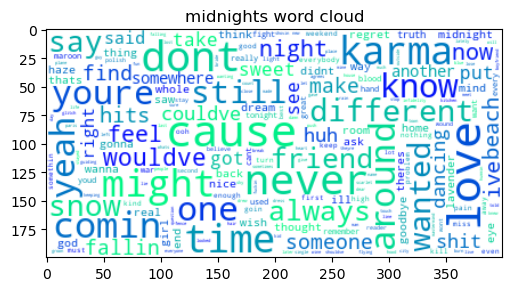

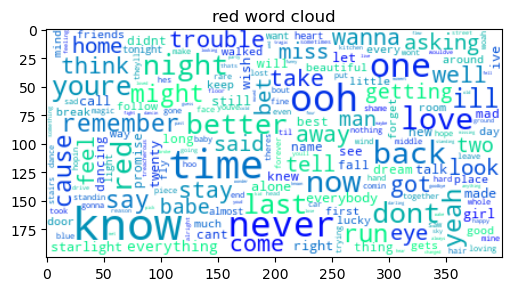

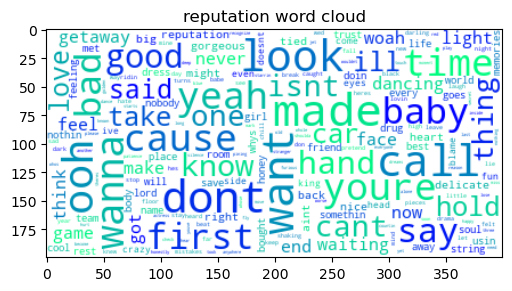

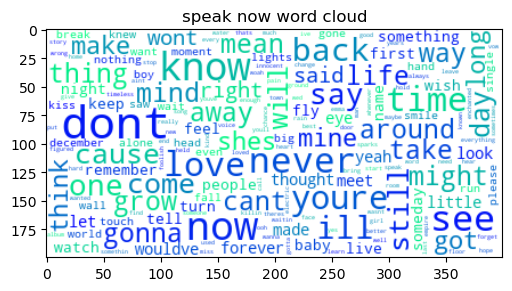

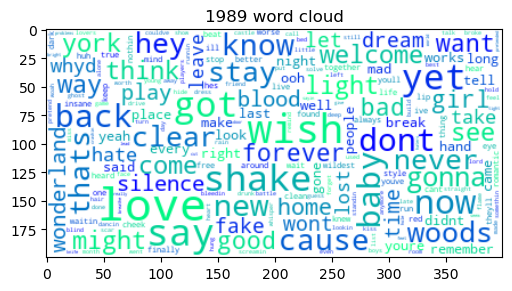

In [3]:
# make all wordclouds
wordcloud(get_text('debut'), 'debut')
wordcloud(get_text('evermore'), 'evermore')
wordcloud(get_text('fearless'), 'fearless')
wordcloud(get_text('folklore'), 'folklore')
wordcloud(get_text('lover'), 'lover')
wordcloud(get_text('midnights'), 'midnights')
wordcloud(get_text('red'), 'red')
wordcloud(get_text('reputation'), 'reputation')
wordcloud(get_text('speak_now'), 'speak now')
wordcloud(get_text('tv_1989'), '1989')

In [4]:
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# function to get sentiment analysis
def sentiment(album, name):
    # make lists
    pos = []
    neg = []
    neu = []
    
    for song in os.listdir(f'{current_dir}/{album}'):
        if not(song.startswith(".")):
            with open(f"{current_dir}/{album}/{song}") as fp:
                
                # get scores for each song
                song_text = fp.read()
                scores = sid.polarity_scores(song_text)
                
                # add to lists
                pos.append(scores['pos'])
                neg.append(scores['neg'])
                neu.append(scores['neu'])
                
    # calculate means
    pos_mean = np.round(np.mean(pos), 3)
    neu_mean = np.round(np.mean(neu), 3)
    neg_mean = np.round(np.mean(neg), 3)
                
    # plot sentiment analysis
    fig, axs = plt.subplots(1,3, sharex = True, figsize = (8,2))
    
    axs[0].hist(pos, color = "green")
    axs[0].set_title(f'{name} positive')
    axs[0].axvline(pos_mean,color='black', linestyle='--')
    axs[0].legend([f'mean = {pos_mean}'], prop={'size': 6}, loc=1)
    
    axs[1].hist(neu, color = "orange")
    axs[1].set_title(f'{name} neutral')
    axs[1].axvline(neu_mean,color='black', linestyle='--')
    axs[1].legend([f'mean = {neu_mean}'], prop={'size': 6}, loc=2)
    
    axs[2].hist(neg, color = "red")
    axs[2].set_title(f'{name} negative')
    axs[2].axvline(neg_mean,color='black', linestyle='--')
    axs[2].legend([f'mean = {neg_mean}'], prop={'size': 6}, loc=1)

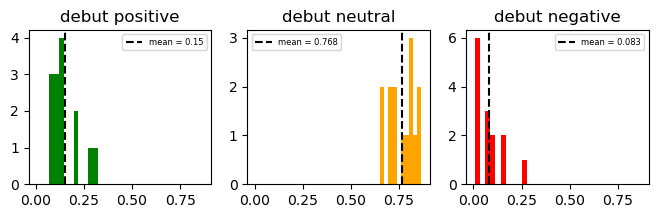

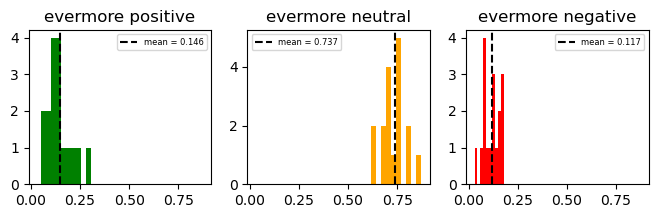

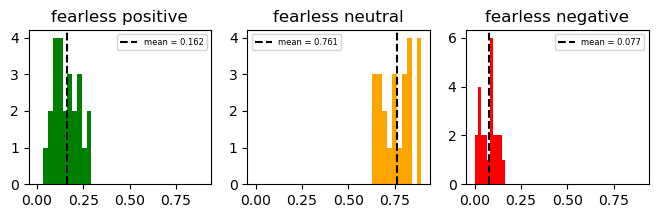

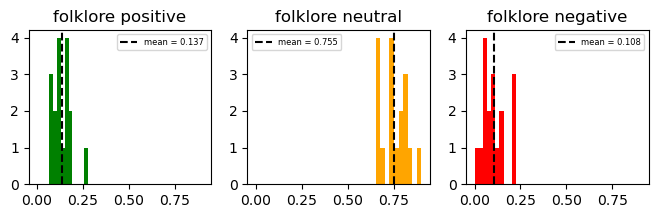

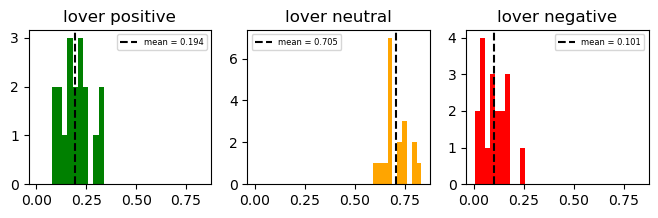

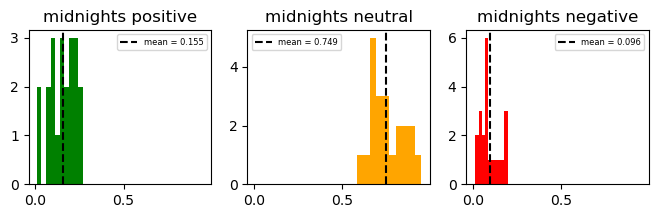

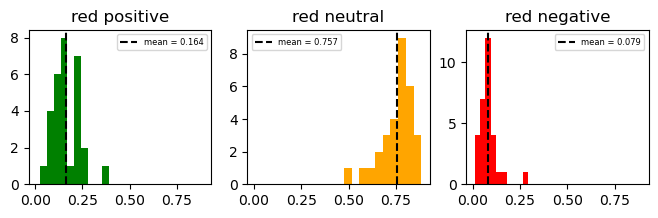

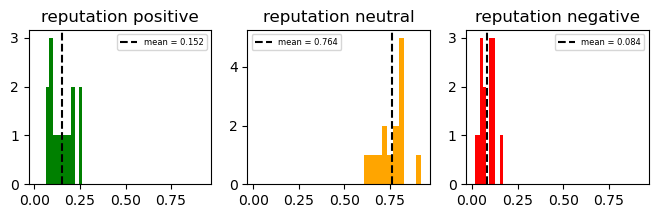

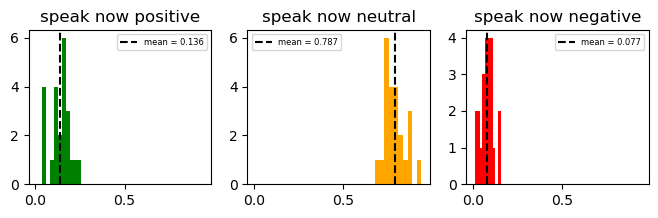

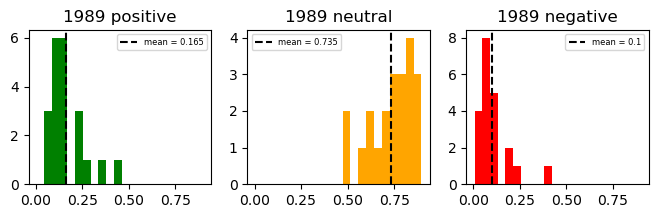

In [6]:
sentiment('debut', 'debut')
sentiment('evermore', 'evermore')
sentiment('fearless', 'fearless')
sentiment('folklore', 'folklore')
sentiment('lover', 'lover')
sentiment('midnights', 'midnights')
sentiment('red', 'red')
sentiment('reputation', 'reputation')
sentiment('speak_now', 'speak now')
sentiment('tv_1989', '1989')

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import OrderedDict
import os

# get directory
current_dir = os.getcwd()
sid = SentimentIntensityAnalyzer()

# function to get top 10 songs
def top(albumName):
    # make lists
    pos = {}
    neg = {}
    neu = {}
    
    for song in os.listdir(f'{current_dir}/{albumName}'):
        if not(song.startswith(".")):
            with open(f"{current_dir}/{albumName}/{song}") as fp:
                
                # get scores for each song
                song_text = fp.read().split()
                
                # add to lists
                for word in song_text:
                    
                    # clean word
                    word = ''.join(filter(str.isalpha, word))
                    word = word.lower()
                    
                    if (sid.polarity_scores(word)['compound']) >= 0.5:
                        if word in pos:
                            pos[word] += 1
                        else: 
                            pos[word] = 1
                    elif (sid.polarity_scores(word)['compound']) <= -0.5:
                        if word in neg:
                            neg[word] += 1
                        else: 
                            neg[word] = 1

    sorted_pos = sorted(pos.items(), key=lambda x:x[1], reverse=True)
    sorted_neg = sorted(neg.items(), key=lambda x:x[1], reverse=True)
    return sorted_pos[0:10], sorted_neg[0:10]

In [13]:
debut_pos = dict(top('debut')[0])
debut_neg = dict(top('debut')[1])

evermore_pos = dict(top('evermore')[0])
evermore_neg = dict(top('evermore')[1])

fearless_pos = dict(top('fearless')[0])
fearless_neg = dict(top('fearless')[1])

folklore_pos = dict(top('folklore')[0])
folklore_neg = dict(top('folklore')[1])

lover_pos = dict(top('lover')[0])
lover_neg = dict(top('lover')[1])

midnights_pos = dict(top('midnights')[0])
midnights_neg = dict(top('midnights')[1])

red_pos = dict(top('red')[0])
red_neg = dict(top('red')[1])

reputation_pos = dict(top('reputation')[0])
reputation_neg = dict(top('reputation')[1])

speak_pos = dict(top('speak_now')[0])
speak_neg = dict(top('speak_now')[1])

pos_1989 = dict(top('tv_1989')[0])
neg_1989 = dict(top('tv_1989')[1])

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_album(data, sentiment, name):
    word = data.keys()
    count = data.values()
    y_pos = np.arange(len(word))

    plt.barh(y_pos, count, align='center', alpha=0.5)
    plt.yticks(y_pos, word)
    plt.xlabel('Number of Occurances')
    plt.title(f'Top 10 {sentiment} Words in {name}')
    plt.show()

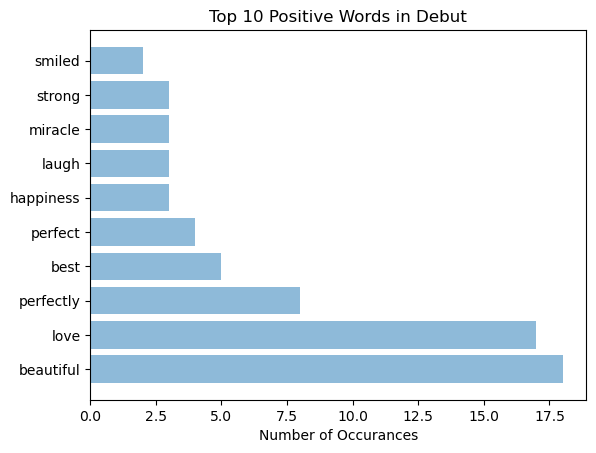

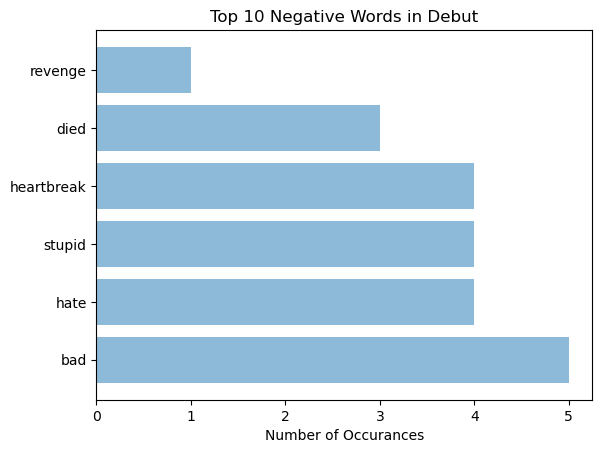

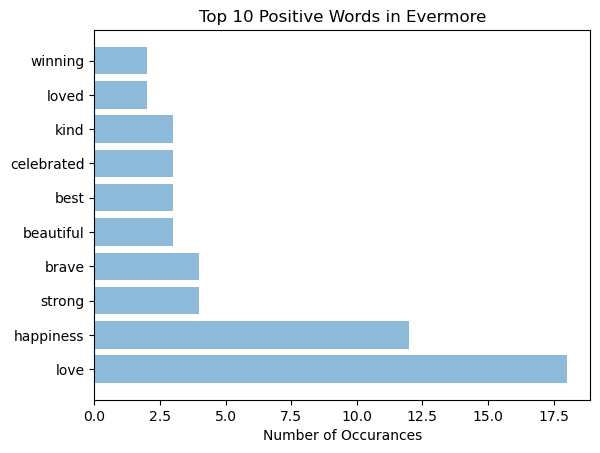

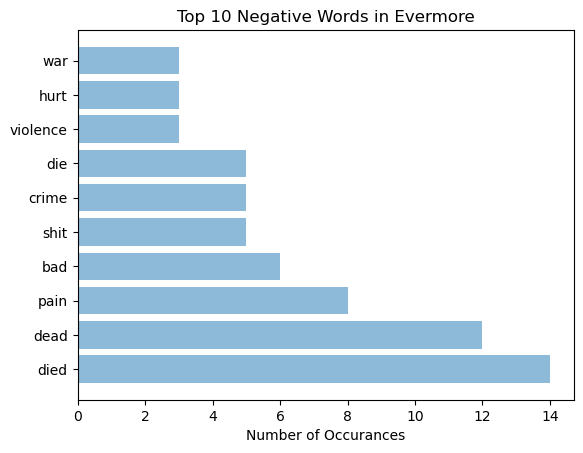

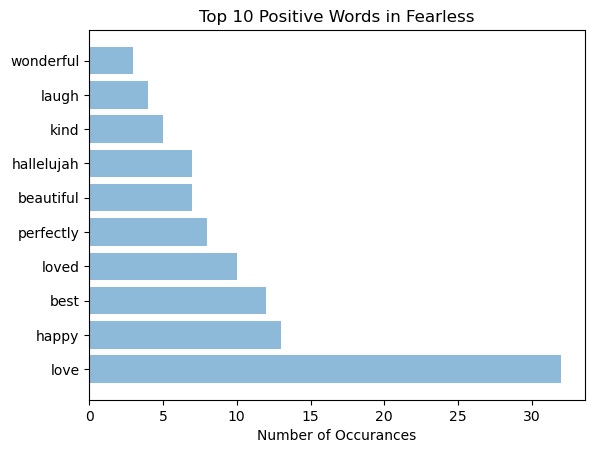

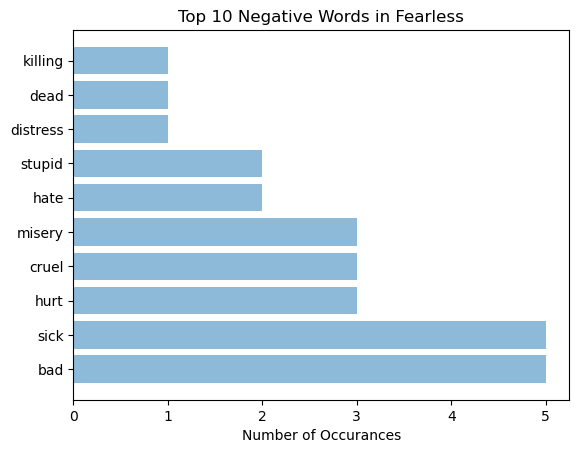

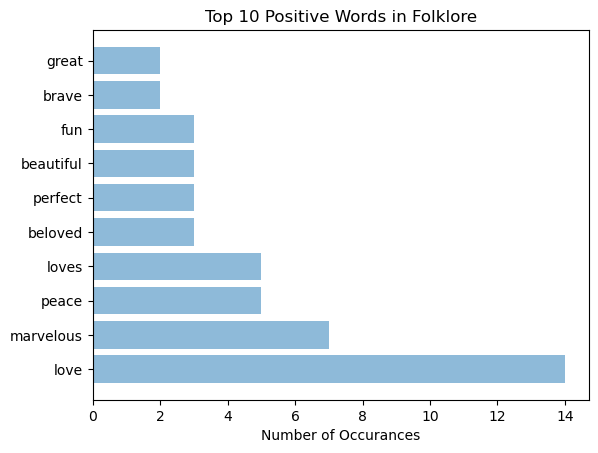

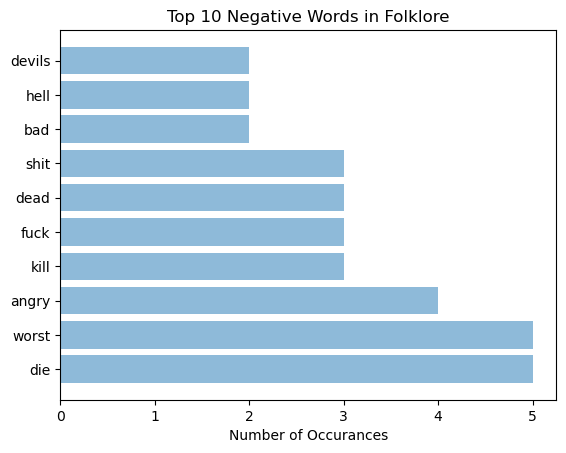

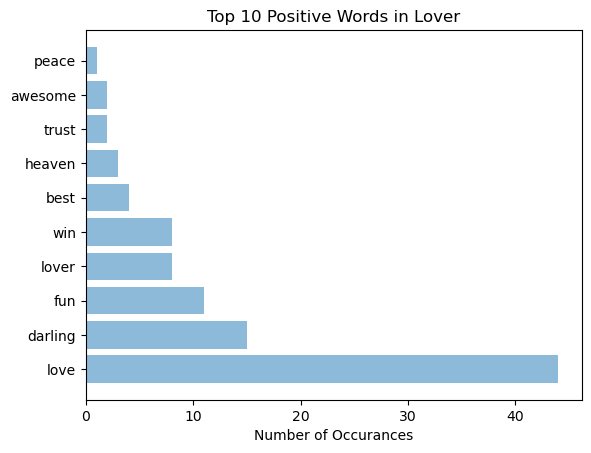

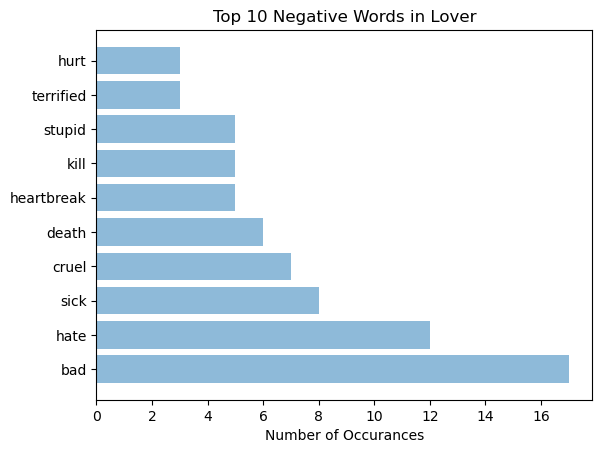

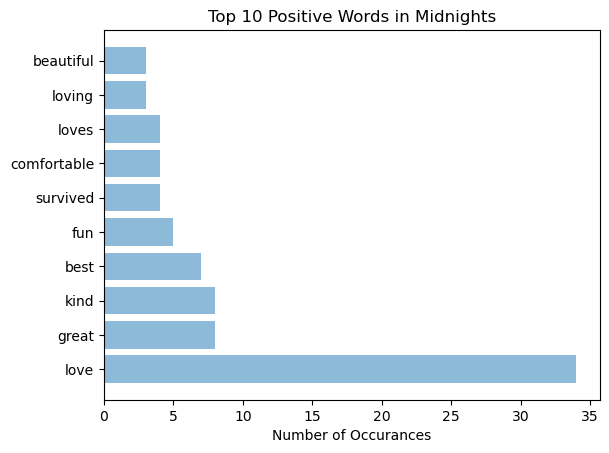

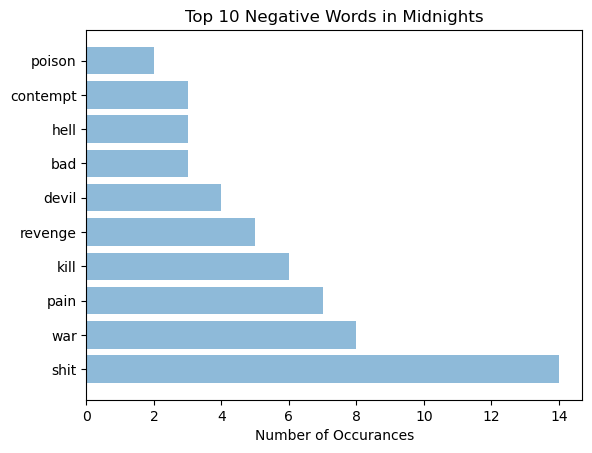

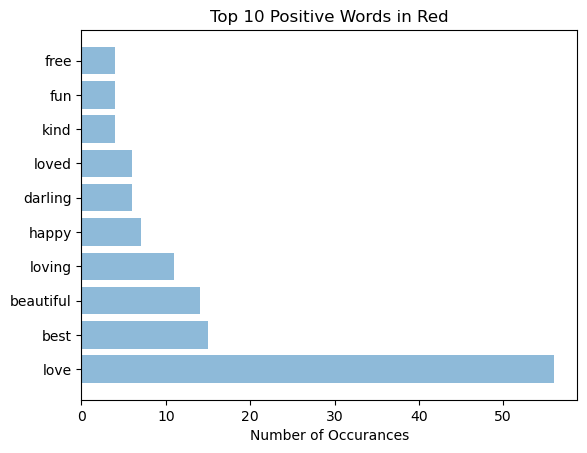

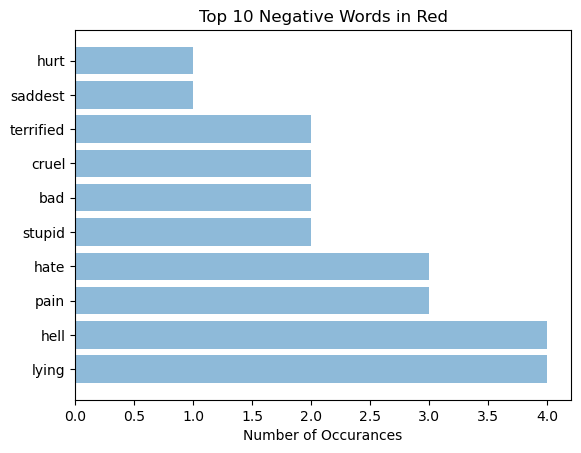

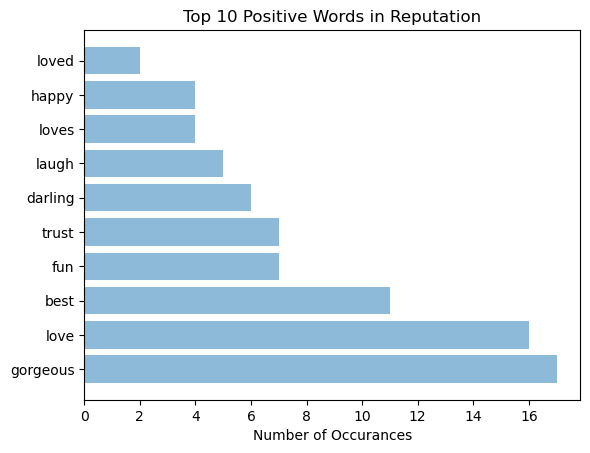

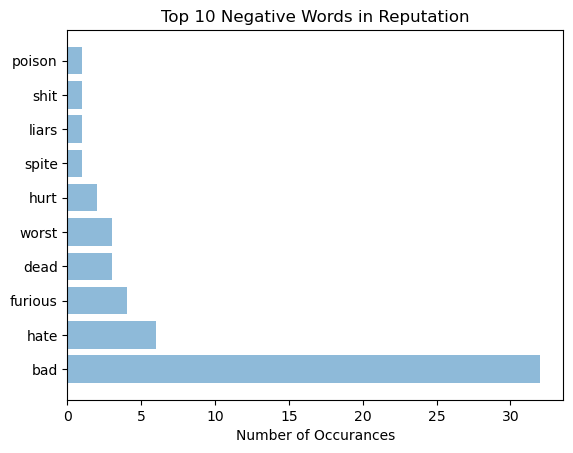

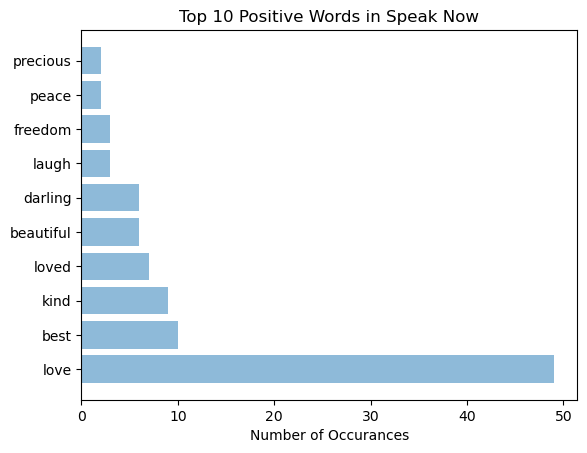

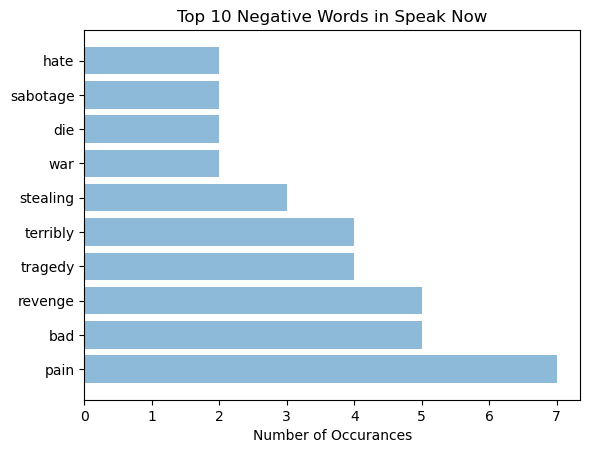

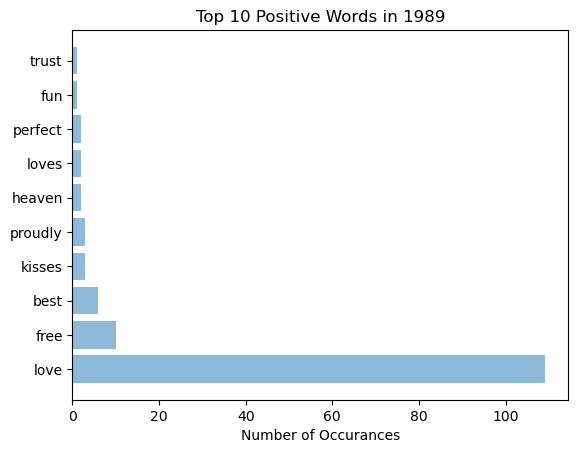

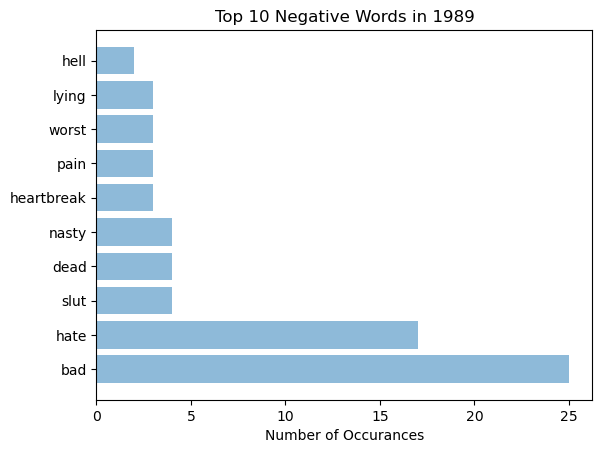

In [52]:
plot_album(debut_pos, 'Positive', 'Debut')
plot_album(debut_neg, 'Negative', 'Debut')

plot_album(evermore_pos, 'Positive', 'Evermore')
plot_album(evermore_neg, 'Negative', 'Evermore')

plot_album(fearless_pos, 'Positive', 'Fearless')
plot_album(fearless_neg, 'Negative', 'Fearless')

plot_album(folklore_pos, 'Positive', 'Folklore')
plot_album(folklore_neg, 'Negative', 'Folklore')

plot_album(lover_pos, 'Positive', 'Lover')
plot_album(lover_neg, 'Negative', 'Lover')

plot_album(midnights_pos, 'Positive', 'Midnights')
plot_album(midnights_neg, 'Negative', 'Midnights')

plot_album(red_pos, 'Positive', 'Red')
plot_album(red_neg, 'Negative', 'Red')

plot_album(reputation_pos, 'Positive', 'Reputation')
plot_album(reputation_neg, 'Negative', 'Reputation')

plot_album(speak_pos, 'Positive', 'Speak Now')
plot_album(speak_neg, 'Negative', 'Speak Now')

plot_album(pos_1989, 'Positive', '1989')
plot_album(neg_1989, 'Negative', '1989')